In [1]:
import numpy as np
import simulation
import pynbody
import matplotlib
import matplotlib.pyplot as plt

In [2]:
amu = pynbody.units.NamedUnit("amu",1.660539e-27*pynbody.units.kg)

In [3]:
gadget_time_units = pynbody.units.Unit('kpc km**-1 s')
gadget_vel_units = pynbody.units.Unit('km s**-1')
gadget_acc_units = gadget_vel_units/gadget_time_units
gadget_acc_units

Unit("km**2 kpc**-1 s**-2")

In [4]:
@pynbody.derived_array
def acce_norm(self):
    arr = np.sqrt((self['acce'] ** 2).sum(axis=1))
    arr.units = gadget_acc_units
    return  arr

@pynbody.derived_array
def dt_acc(self, errtol=0.05, softening=0.03):
    return (np.sqrt(2 * errtol * softening / self['acce_norm'] * pynbody.units.kpc)).in_units('kpc km**-1 s')

In [5]:
SIM_PATH='ts_60_low_density'

sim = simulation.Simulation('np_glass_mb.62002_p200_a800_r600/out', snap_indexes=slice(-10,None))
# sim = simulation.Simulation(SIM_PATH+'/out', snap_indexes=slice(-10,None))

loading simulation: np_glass_mb.62002_p200_a800_r600/out
Found parameter file
Found compiler file
Found 85 snapshots
Taking 10 snapshots (slice(-10, None, None))
Loading cosmological parameters
Found trace file


In [6]:
#2 * All.CourantFac * SphP[p].Hsml / SphP[p].MaxSignalVel;
@pynbody.derived_array
def dt_courant(self, courant = 0.1):
    return (2 * courant * self['smooth'] / self['cs']).in_units(gadget_time_units)

In [7]:
s = sim[-1]

In [8]:
s.header.time

9.229999586099037

In [9]:
s.g['dt_acc'].min(),s.g['dt_acc'].max(),s.g['dt_acc'].mean()

(SimArray(6.79645e-05, dtype=float32, 'kpc km**-1 s'),
 SimArray(0.00822057, dtype=float32, 'kpc km**-1 s'),
 SimArray(0.00074953, dtype=float32, 'kpc km**-1 s'))

In [10]:
s.g['dt_courant']

SimArray([0.002029  , 0.00209973, 0.00211666, ..., 0.00198448, 0.00209724,
          0.00209924], 'kpc km**-1 s')

In [11]:
s.g['dt_courant'].in_units(gadget_time_units).min(),s.g['dt_courant'].in_units(gadget_time_units).max(),s.g['dt_courant'].in_units(gadget_time_units).mean()

(SimArray(0.00037607, 'kpc km**-1 s'),
 SimArray(0.02593679, 'kpc km**-1 s'),
 SimArray(0.002061, 'kpc km**-1 s'))

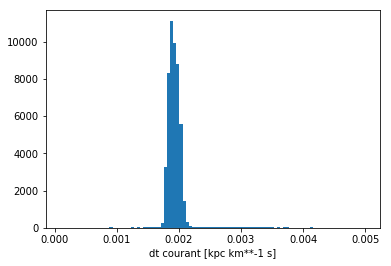

In [12]:
plt.hist(s.g['dt_courant'], bins=100, range=(1e-4, 5e-3));
plt.xlabel('dt courant [kpc km**-1 s]');
# plt.xscale('log')

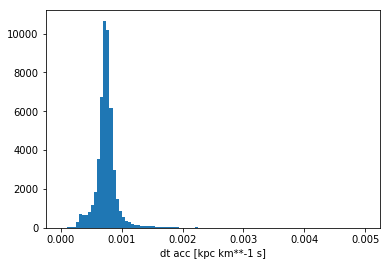

In [13]:
plt.hist(s.g['dt_acc'], bins=100, range=(0, 5e-3));
plt.xlabel('dt acc [kpc km**-1 s]');

In [14]:
s.g[s.g['dt_acc']<s.g['dt_courant']]

<SimSnap "np_glass_mb.62002_p200_a800_r600/out/snapshot_0085::gas:indexed" len=51576>

In [15]:
s.g['cs'].in_units('km s**-1')

SimArray([388.93899855, 386.64099208, 386.59624096, ..., 390.26658062,
          388.05374903, 388.60916951], 'km s**-1')

Text(0, 0.5, '$c_s$ [km/s]')

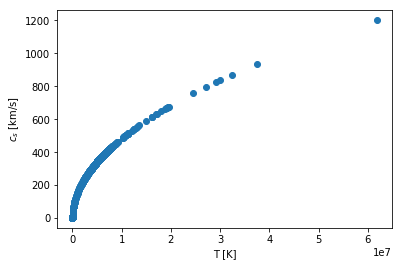

In [16]:
plt.scatter(s.g['temp'], s.g['cs'].in_units('km s**-1'))
plt.xlabel('T [K]')
plt.ylabel('$c_s$ [km/s]')

Text(0.5, 0, '$c_s$ [km/s]')

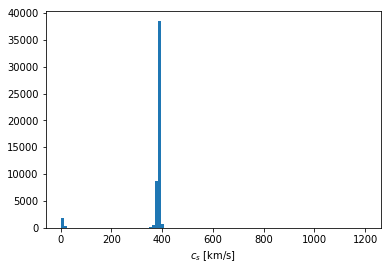

In [17]:
plt.hist(s.g['cs'].in_units('km s**-1'), bins=100);
plt.xlabel('$c_s$ [km/s]')

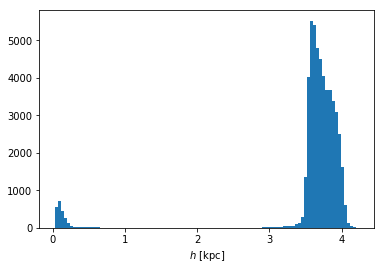

In [18]:
plt.hist(s.g['smooth'].in_units('kpc'), bins=100);
plt.xlabel('$h$ [kpc]');

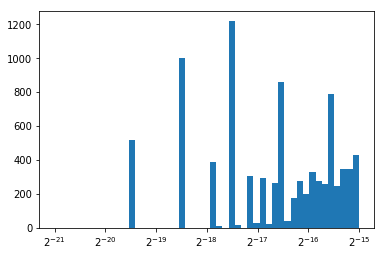

In [19]:
plt.hist(s.g['tstp'], bins=np.logspace(-21, -15, base=2));
ax = plt.gca()
ax.set_xscale('log', basex=2)

In [20]:
s.g['tstp']

SimArray([3.4265287e-04, 3.4265287e-04, 9.3694143e-06, ..., 1.1176373e-04,
          1.6061853e-05, 1.4723366e-05], dtype=float32)

In [21]:
s.g['tstp'].min(), s.g['tstp'].max(), s.g['tstp'].mean()

(SimArray(1.3384878e-06, dtype=float32),
 SimArray(0.00068531, dtype=float32),
 SimArray(0.00026107, dtype=float32))

In [22]:
s.g['dt_courant'].in_units(gadget_time_units).min(),s.g['dt_courant'].in_units(gadget_time_units).max(),s.g['dt_courant'].in_units(gadget_time_units).mean()

(SimArray(0.00037607, 'kpc km**-1 s'),
 SimArray(0.02593679, 'kpc km**-1 s'),
 SimArray(0.002061, 'kpc km**-1 s'))

In [23]:
s.g['temp'].min(), s.g['temp'].max(), s.g['temp'].mean()

(SimArray(95.28491, dtype=float32, 'K'),
 SimArray(61853840., dtype=float32, 'K'),
 SimArray(6164551., dtype=float32, 'K'))